In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [34]:
import skgeom as sg
from skgeom.draw import draw

In [46]:
def toPoint2(p):
    return sg.Point2(p[0], p[1])

def toVector(p1, p2):
    # Return vector witch homogeneos coordenate
    v = np.array(p1) - np.array(p2)
    return np.array([v[0], v[1], 1])

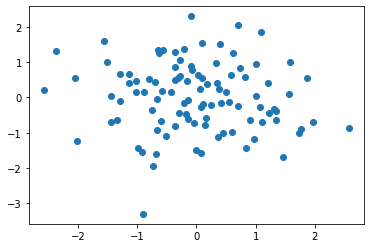

In [32]:
mean = 0
std = 1
n = 100

np.random.seed(21)
xSample = np.random.normal(mean, std, n)
ySample = np.random.normal(mean, std, n)

plt.figure()
plt.scatter(xSample, ySample)

In [51]:
points = list(zip(xSample, ySample))
points.sort(key=lambda x: x[0]) # ordenamos por el eje x

hull = []
leftMost = points[0]
currentVertex = leftMost
hull.append(currentVertex)
nextVertex = points[1]
index = 2
nextIndex = -1


In [52]:
checkingPoint = points[index]
u = toVector(nextVertex, currentVertex)
v = toVector(checkingPoint, currentVertex)
cross = np.cross(u, v)
if cross[2]<0:
    nextVertex = checkingPoint
    nextIndex = index
index += 1
if index == len(points):
    hull.append(nextVertex)
    currentVertex = nextVertex
    index = 0
    # splice..
    points = points[nextIndex:]
    nextVertex = leftMost

## Plot using SKGEOM

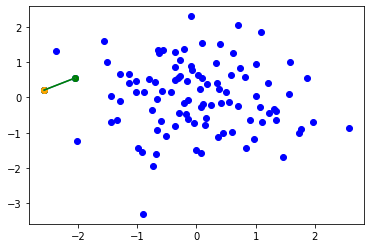

In [53]:
# plot todos los puntos que estaban previamente ordenados
# y resaltamos de color rojo el
points_sg = []
for i in range(n):
    x, y = points[i]
    points_sg.append(sg.Point2(x, y))
draw(points_sg, color='blue') # draw all points
draw(toPoint2(leftMost), color='red') # Draw only the leftMost point

draw(sg.Segment2(toPoint2(currentVertex),toPoint2(nextVertex)))
draw(sg.Segment2(toPoint2(currentVertex),toPoint2(checkingPoint)), color='green')
draw(toPoint2(currentVertex), color='orange') # Draw only the currentVertex point

In [22]:
# https://gist.github.com/WetHat/d69ce0e94e337538e5b4c848501522aa